In [47]:
!pip install beautifulsoup4
!pip install lxml
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 


from IPython.display import display_html
import pandas as pd
import numpy as np
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Folium installed')
print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Folium installed
Libraries imported.


In [3]:
url1 = 'https://en.wikipedia.org/wiki/Districts_of_Barcelona'

s = requests.Session()
response = s.get(url1,timeout = 10)
response
soup = BeautifulSoup(response.text)
soup.title.string
table_districts = soup.find('table',{"class":'wikitable'})


In [4]:
header = [th.text.rstrip() for th in table_districts.find_all("th")]
print(header)

['Number', 'District', 'Size km2', 'Population', 'Density inhabitants/km2', 'Neighbourhoods', 'Councilman[2]', 'Party']


In [5]:
c1=[]
c2=[]
c3=[]
c4=[]
c5=[]
c6=[]
c7=[]
c8=[]
for row in table_districts.findAll("tr"):
    cells = row.findAll('td')
    if len(cells) == 8:
        c1.append(cells[0].find(text = True))
        c2.append(cells[1].find(text = True))
        c3.append(cells[2].find(text = True))
        c4.append(cells[3].find(text = True))
        c5.append(cells[4].find(text = True))
        c6.append(cells[5].find(text = True))
        c7.append(cells[6].find(text = True))
        c8.append(cells[7].find(text = True))

In [6]:
d = dict([(x,0) for x in header])
d

{'Number': 0,
 'District': 0,
 'Size km2': 0,
 'Population': 0,
 'Density inhabitants/km2': 0,
 'Neighbourhoods': 0,
 'Councilman[2]': 0,
 'Party': 0}

In [7]:
d['Number'] = c1
d['District'] = c2
d['Size km2']=c3
d['Population'] =c4
d['Density inhabitants/km2'] = c5
d['Neighbourhoods'] = c6
d['Councilman[2]'] = c7
d['Party'] = c8

In [8]:
df_table = pd.DataFrame(d)
df_table['latitude'] = ['41.37498','41.38896','41.3726','41.38845','41.40104','41.40237','41.41849','41.44163','41.43541','41.41814']
df_table['longitude'] = ['2.17327','2.16179','2.1546','2.12171','2.1394','2.15641','2.1677','2.17727','2.18982','2.19933']
df_table.Number = ['1','2','3','4','5','6','7','8','9','10']
df_table = df_table.rename(columns={'Size km2': 'Size_km2'})
df_table.Size_km2 = ['4.49','7.46','21.35','6.08','20.09','4.19','11.96','8.04','6.56','10.80']
df_table.Population = ['111.290','262.485','177.636','82.588','140.461','120.087','169.920','164.981','142.598','221.029']
df_table = df_table.rename(columns={'Density inhabitants/km2':'Density_inhabitants_km2'})
df_table.Density_inhabitants_km2 = ['24.786','35.586','8.321','13.584','6.992','28.660','14.217','20.520','21.737','20.466']

df_table

,Number,District,Size_km2,Population,Density_inhabitants_km2,Neighbourhoods,Councilman[2],Party,latitude,longitude
0,1,Ciutat Vella,4.49,111.290,24.786,La Barceloneta,Jordi Rabassa i Massons\n,Barcelona en Comú,41.37498,2.17327
1,2,Eixample,7.46,262.485,35.586,L'Antiga Esquerra de l'Eixample,Jordi Martí Grau\n,Barcelona en Comú,41.38896,2.16179
2,3,Sants-Montjuïc,21.35,177.636,8.321,La Bordeta,Marc Serra Solé\n,Barcelona en Comú,41.3726,2.1546
3,4,Les Corts,6.08,82.588,13.584,les Corts,Xavier Marcé Carol\n,Socialists' Party of Catalonia,41.38845,2.12171
4,5,Sarrià-Sant Gervasi,20.09,140.461,6.992,El Putget i Farró,Albert Batlle i Bastardas\n,Socialists' Party of Catalonia,41.40104,2.1394
5,6,Gràcia,4.19,120.087,28.660,Vila de Gràcia,Eloi Badia i Casas\n,Barcelona en Comú,41.40237,2.15641
6,7,Horta-Guinardó,11.96,169.920,14.217,El Baix Guinardó,Rosa Alarcón\n,Socialists' Party of Catalonia,41.41849,2.1677
7,8,Nou Barris,8.04,164.981,20.520,Can Peguera,Marga Marí-Klose\n,Socialists' Party of Catalonia,41.44163,2.17727
8,9,Sant Andreu,6.56,142.598,21.737,Baró de Viver,Lucía Martín González\n,Barcelona en Comú,41.43541,2.18982
9,10,Sant Martí,10.80,221.029,20.466,El Besòs i el Maresme,David Escudé Rodríguez\n,Socialists' Party of Catalonia,41.41814,2.19933


In [9]:
df_table[["Number", "Size_km2",'Density_inhabitants_km2','latitude','longitude']] = df_table[["Number", "Size_km2",'Density_inhabitants_km2','latitude','longitude']].apply(pd.to_numeric)
df_table.dtypes

Number                       int64
District                    object
Size_km2                   float64
Population                  object
Density_inhabitants_km2    float64
Neighbourhoods              object
Councilman[2]               object
Party                       object
latitude                   float64
longitude                  float64
dtype: object

In [10]:
from geopy.geocoders import Nominatim 

address = "Barcelona, Barcelona"

geolocator = Nominatim(user_agent = "Barcelona_research")

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print("The geographical coordinates of Barcelona are {}, {}.".format(latitude, longitude))

The geographical coordinates of Barcelona are 41.3828939, 2.1774322.


Visualization of the districts above

In [11]:
map_barcelona = folium.Map(location=[41.38879,2.15899],zoom_start=10)

for lat,lng,neighbourhood in zip(df_table['latitude'],df_table['longitude'],df_table['Neighbourhoods']):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_barcelona)
map_barcelona

Now we extract the data from the Foursquare API 

In [12]:
CLIENT_ID = "4DS1ABDGWBMFPCR20K4JC2S554DDRHMZAO01XMJ3ZBPNZNYK"
CLIENT_SECRET = "FCQBNVEGNBKLW5Q4Z4ZGVWIJ3UCMSGB2OSVAB40RF1NDWRLI" 
VERSION = "20200409"

In [21]:
neighborhood_latitude = 41.37498
neighborhood_longitude = 2.17327 
LIMIT = 1000
radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=4DS1ABDGWBMFPCR20K4JC2S554DDRHMZAO01XMJ3ZBPNZNYK&client_secret=FCQBNVEGNBKLW5Q4Z4ZGVWIJ3UCMSGB2OSVAB40RF1NDWRLI&v=20200409&ll=41.37498,2.17327&radius=500&limit=1000'

In [22]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60701d48bf44315aaa0f57ec'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'El Raval',
  'headerFullLocation': 'El Raval, Barcelona',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 52,
  'suggestedBounds': {'ne': {'lat': 41.3794800045, 'lng': 2.1792556127258202},
   'sw': {'lat': 41.3704799955, 'lng': 2.16728438727418}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '59f8e8f8efa82a7ff95be2d4',
       'name': 'The Fish & Chips Shop',
       'location': {'address': 'Perecamps,7.',
        'lat': 41.375965,
        'lng': 2.1741521,
        'labeledLatLngs': [{'label': 'display',
          'lat': 41.375965,
          'lng': 2.174

In [23]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [24]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON


filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]


nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)


nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(20)

<ipython-input-24-f5e18700a056>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,The Fish & Chips Shop,Bistro,41.375965,2.174152
1,macera,Cocktail Bar,41.375589,2.170493
2,Marea Alta,Seafood Restaurant,41.376484,2.175106
3,Cassette Bar,Bar,41.377324,2.173629
4,Pizza Circus,Pizza Place,41.377905,2.172911
5,Museu Marítim de Barcelona,Museum,41.375789,2.175841
6,My Fu*king Restaurant,Spanish Restaurant,41.377767,2.173236
7,Miscelanea Gallery-Shop-Café,Art Gallery,41.377702,2.173564
8,Sala Apolo,Concert Hall,41.374355,2.169668
9,Chic & Basic,Hotel,41.376844,2.174772


In [25]:
def getNearbyVenues(names, latitudes, longitudes, radius=1500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [26]:
barcelona_venues = getNearbyVenues(names=df_table['District'],
                                   latitudes=df_table['latitude'],
                                   longitudes=df_table['longitude']
                                  )

Ciutat Vella
Eixample
Sants-Montjuïc
Les Corts
Sarrià-Sant Gervasi
Gràcia
Horta-Guinardó
Nou Barris
Sant Andreu
Sant Martí


In [27]:
print(barcelona_venues.shape)
barcelona_venues.head(250)

(986, 7)


,District,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ciutat Vella,41.37498,2.17327,macera,41.375589,2.170493,Cocktail Bar
1,Ciutat Vella,41.37498,2.17327,Pizza Circus,41.377905,2.172911,Pizza Place
2,Ciutat Vella,41.37498,2.17327,El Pachuco,41.376369,2.169148,Mexican Restaurant
3,Ciutat Vella,41.37498,2.17327,My Fu*king Restaurant,41.377767,2.173236,Spanish Restaurant
4,Ciutat Vella,41.37498,2.17327,Teatre Victoria,41.374573,2.168835,Theater
...,...,...,...,...,...,...,...
245,Sants-Montjuïc,41.37260,2.15460,Artico barcelona,41.375732,2.161534,Ice Cream Shop
246,Sants-Montjuïc,41.37260,2.15460,Hotel Villa Emilia,41.380392,2.154117,Hotel
247,Sants-Montjuïc,41.37260,2.15460,Bar Ramón,41.378729,2.160632,Bar
248,Sants-Montjuïc,41.37260,2.15460,La Güerita Mexicana,41.377694,2.161921,Mexican Restaurant


In [28]:
barcelona_venues.groupby("District").count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
District,,,,,,
Ciutat Vella,100,100,100,100,100,100
Eixample,100,100,100,100,100,100
Gràcia,100,100,100,100,100,100
Horta-Guinardó,100,100,100,100,100,100
Les Corts,100,100,100,100,100,100
Nou Barris,100,100,100,100,100,100
Sant Andreu,100,100,100,100,100,100
Sant Martí,86,86,86,86,86,86
Sants-Montjuïc,100,100,100,100,100,100


In [29]:
print('There are {} unique venue categories.'.format(len(barcelona_venues['Venue Category'].unique())))

There are 175 unique venue categories.


In [30]:
barcelona_onehot = pd.get_dummies(barcelona_venues[['Venue Category']], prefix="", prefix_sep="")

barcelona_onehot['Neighborhood'] = barcelona_venues['District'] 

fixed_columns = [barcelona_onehot.columns[-1]] + list(barcelona_onehot.columns[:-1])
barcelona_onehot = barcelona_onehot[fixed_columns]

barcelona_onehot

,Yoga Studio,Accessories Store,African Restaurant,Amphitheater,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Bakery,...,Track,Trail,Tram Station,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Wine Bar,Wine Shop,Winery
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
983,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
barcelona_grouped = barcelona_onehot.groupby('Neighborhood').mean().reset_index()
barcelona_grouped

,Neighborhood,Yoga Studio,Accessories Store,African Restaurant,Amphitheater,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,...,Track,Trail,Tram Station,Turkish Restaurant,University,Vegetarian / Vegan Restaurant,Video Game Store,Wine Bar,Wine Shop,Winery
0,Ciutat Vella,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.01,0.000000,...,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.020000,0.02,0.00
1,Eixample,0.00,0.00,0.00,0.000000,0.03,0.01,0.00,0.00,0.000000,...,0.00,0.00,0.000000,0.00,0.00,0.01,0.00,0.010000,0.00,0.00
2,Gràcia,0.00,0.00,0.00,0.000000,0.00,0.01,0.00,0.00,0.000000,...,0.00,0.00,0.000000,0.00,0.00,0.02,0.00,0.040000,0.00,0.00
3,Horta-Guinardó,0.01,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.010000,...,0.00,0.00,0.000000,0.01,0.00,0.01,0.00,0.000000,0.00,0.01
4,Les Corts,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.02,0.000000,...,0.00,0.01,0.000000,0.00,0.00,0.01,0.00,0.000000,0.01,0.00
5,Nou Barris,0.00,0.00,0.00,0.000000,0.01,0.00,0.00,0.02,0.000000,...,0.01,0.00,0.000000,0.00,0.00,0.00,0.01,0.000000,0.00,0.00
6,Sant Andreu,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.01,0.000000,...,0.01,0.00,0.000000,0.00,0.00,0.00,0.01,0.000000,0.00,0.00
7,Sant Martí,0.00,0.00,0.00,0.011628,0.00,0.00,0.00,0.00,0.023256,...,0.00,0.00,0.011628,0.00,0.00,0.00,0.00,0.011628,0.00,0.00
8,Sants-Montjuïc,0.00,0.00,0.00,0.000000,0.02,0.00,0.03,0.01,0.000000,...,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.020000,0.00,0.00
9,Sarrià-Sant Gervasi,0.00,0.01,0.01,0.000000,0.00,0.02,0.00,0.00,0.000000,...,0.00,0.00,0.000000,0.00,0.01,0.00,0.00,0.030000,0.01,0.00


In [33]:
num_top_venues = 10

for hood in barcelona_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = barcelona_grouped[barcelona_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Ciutat Vella----
                venue  freq
0    Tapas Restaurant  0.12
1               Hotel  0.06
2         Coffee Shop  0.05
3         Pizza Place  0.05
4        Cocktail Bar  0.04
5               Plaza  0.04
6  Spanish Restaurant  0.04
7                Café  0.04
8            Beer Bar  0.03
9                Park  0.03


----Eixample----
                    venue  freq
0                   Hotel  0.10
1        Tapas Restaurant  0.06
2      Spanish Restaurant  0.04
3               Bookstore  0.04
4                  Bakery  0.04
5                Beer Bar  0.03
6  Argentinian Restaurant  0.03
7          Sandwich Place  0.03
8             Coffee Shop  0.03
9              Restaurant  0.03


----Gràcia----
                      venue  freq
0          Tapas Restaurant  0.08
1                Restaurant  0.07
2                    Bakery  0.04
3                  Wine Bar  0.04
4                     Plaza  0.04
5  Mediterranean Restaurant  0.04
6                       Bar  0.04
7       Ind

In [34]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [35]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
barcelona_venues_sorted = pd.DataFrame(columns=columns)
barcelona_venues_sorted['Neighborhood'] = barcelona_grouped['Neighborhood']

for ind in np.arange(barcelona_grouped.shape[0]):
    barcelona_venues_sorted.iloc[ind, 1:] = return_most_common_venues(barcelona_grouped.iloc[ind, :], num_top_venues)

barcelona_venues_sorted.head(27)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ciutat Vella,Tapas Restaurant,Hotel,Pizza Place,Coffee Shop,Café,Plaza,Cocktail Bar,Spanish Restaurant,Beer Bar,Park
1,Eixample,Hotel,Tapas Restaurant,Bookstore,Spanish Restaurant,Bakery,Restaurant,Coffee Shop,Boutique,Beer Bar,Argentinian Restaurant
2,Gràcia,Tapas Restaurant,Restaurant,Plaza,Mediterranean Restaurant,Bakery,Bar,Wine Bar,Indie Movie Theater,Spanish Restaurant,Hostel
3,Horta-Guinardó,Spanish Restaurant,Restaurant,Tapas Restaurant,Brewery,Italian Restaurant,Bakery,Bar,Park,Scenic Lookout,Plaza
4,Les Corts,Restaurant,Gym / Fitness Center,Hotel,Mediterranean Restaurant,Café,Pizza Place,Sporting Goods Shop,Coffee Shop,Park,Cocktail Bar
5,Nou Barris,Spanish Restaurant,Tapas Restaurant,Grocery Store,Park,Bar,Plaza,Pizza Place,Falafel Restaurant,Restaurant,Café
6,Sant Andreu,Tapas Restaurant,Spanish Restaurant,Plaza,Grocery Store,Bar,Restaurant,Café,Burger Joint,Park,Bookstore
7,Sant Martí,Spanish Restaurant,Supermarket,Diner,Tapas Restaurant,Mediterranean Restaurant,Bakery,Gym / Fitness Center,Performing Arts Venue,Pizza Place,Hotel
8,Sants-Montjuïc,Tapas Restaurant,Café,Coffee Shop,Park,Spanish Restaurant,Beer Bar,Plaza,Theater,Japanese Restaurant,Art Museum
9,Sarrià-Sant Gervasi,Mediterranean Restaurant,Spanish Restaurant,Restaurant,Italian Restaurant,Park,Pizza Place,Japanese Restaurant,Gym / Fitness Center,Wine Bar,Hotel


In [48]:
from sklearn.cluster import KMeans

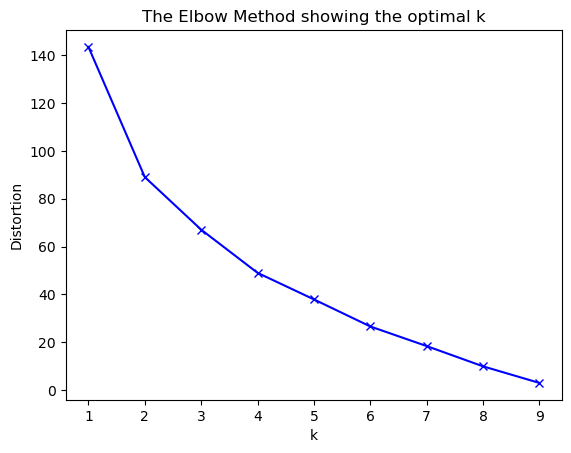

In [61]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(barcelona_grouped_clustering)
    #kmeanModel.fit(istanbul_grouped_clustering)
    distortions.append(sum(np.min(cdist(barcelona_grouped_clustering, kmeanModel.cluster_centers_, 'canberra'), axis=1)) / barcelona_grouped_clustering.shape[0])

#There are different metric distance function for spatial distance. 
#I choose correlation instaed of euclidean because the canberra function gives me more clear view of elbow break point.

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [57]:
ks = 3

barcelona_grouped_clustering = barcelona_grouped.drop('Neighborhood',1)

kmeans = KMeans(n_clusters=ks, random_state=0).fit(barcelona_grouped_clustering)

kmeans.labels_[1:10]
barcelona_merged = df_table
barcelona_merged['Cluster Labels'] = kmeans.labels_

barcelona_merged = barcelona_merged.join(barcelona_venues_sorted.set_index('Neighborhood'), on='District')
barcelona_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ciutat Vella,Tapas Restaurant,Hotel,Pizza Place,Coffee Shop,Café,Plaza,Cocktail Bar,Spanish Restaurant,Beer Bar,Park
1,Eixample,Hotel,Tapas Restaurant,Bookstore,Spanish Restaurant,Bakery,Restaurant,Coffee Shop,Boutique,Beer Bar,Argentinian Restaurant
2,Gràcia,Tapas Restaurant,Restaurant,Plaza,Mediterranean Restaurant,Bakery,Bar,Wine Bar,Indie Movie Theater,Spanish Restaurant,Hostel
3,Horta-Guinardó,Spanish Restaurant,Restaurant,Tapas Restaurant,Brewery,Italian Restaurant,Bakery,Bar,Park,Scenic Lookout,Plaza
4,Les Corts,Restaurant,Gym / Fitness Center,Hotel,Mediterranean Restaurant,Café,Pizza Place,Sporting Goods Shop,Coffee Shop,Park,Cocktail Bar
5,Nou Barris,Spanish Restaurant,Tapas Restaurant,Grocery Store,Park,Bar,Plaza,Pizza Place,Falafel Restaurant,Restaurant,Café
6,Sant Andreu,Tapas Restaurant,Spanish Restaurant,Plaza,Grocery Store,Bar,Restaurant,Café,Burger Joint,Park,Bookstore
7,Sant Martí,Spanish Restaurant,Supermarket,Diner,Tapas Restaurant,Mediterranean Restaurant,Bakery,Gym / Fitness Center,Performing Arts Venue,Pizza Place,Hotel
8,Sants-Montjuïc,Tapas Restaurant,Café,Coffee Shop,Park,Spanish Restaurant,Beer Bar,Plaza,Theater,Japanese Restaurant,Art Museum
9,Sarrià-Sant Gervasi,Mediterranean Restaurant,Spanish Restaurant,Restaurant,Italian Restaurant,Park,Pizza Place,Japanese Restaurant,Gym / Fitness Center,Wine Bar,Hotel


In [59]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(ks)
ys = [i+x+(i*x)**2 for i in range(ks)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(barcelona_merged['latitude'], barcelona_merged['longitude'], barcelona_merged['District'], barcelona_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [66]:
count_venue = barcelona_merged
count_venue = count_venue.drop(['District', 'latitude', 'longitude'], axis=1)
count_venue = count_venue.groupby(['Cluster Labels','1st Most Common Venue']).size().reset_index(name='Counts')

#we can transpose it to plot bar chart
cv_cluster = count_venue.pivot(index='Cluster Labels', columns='1st Most Common Venue', values='Counts')
cv_cluster = cv_cluster.fillna(0).astype(int).reset_index(drop=True)
cv_cluster

1st Most Common Venue,Hotel,Mediterranean Restaurant,Restaurant,Spanish Restaurant,Tapas Restaurant
0,0,1,0,1,0
1,0,0,1,2,1
2,1,0,0,0,3


Text(0, 0.5, 'Clusters')

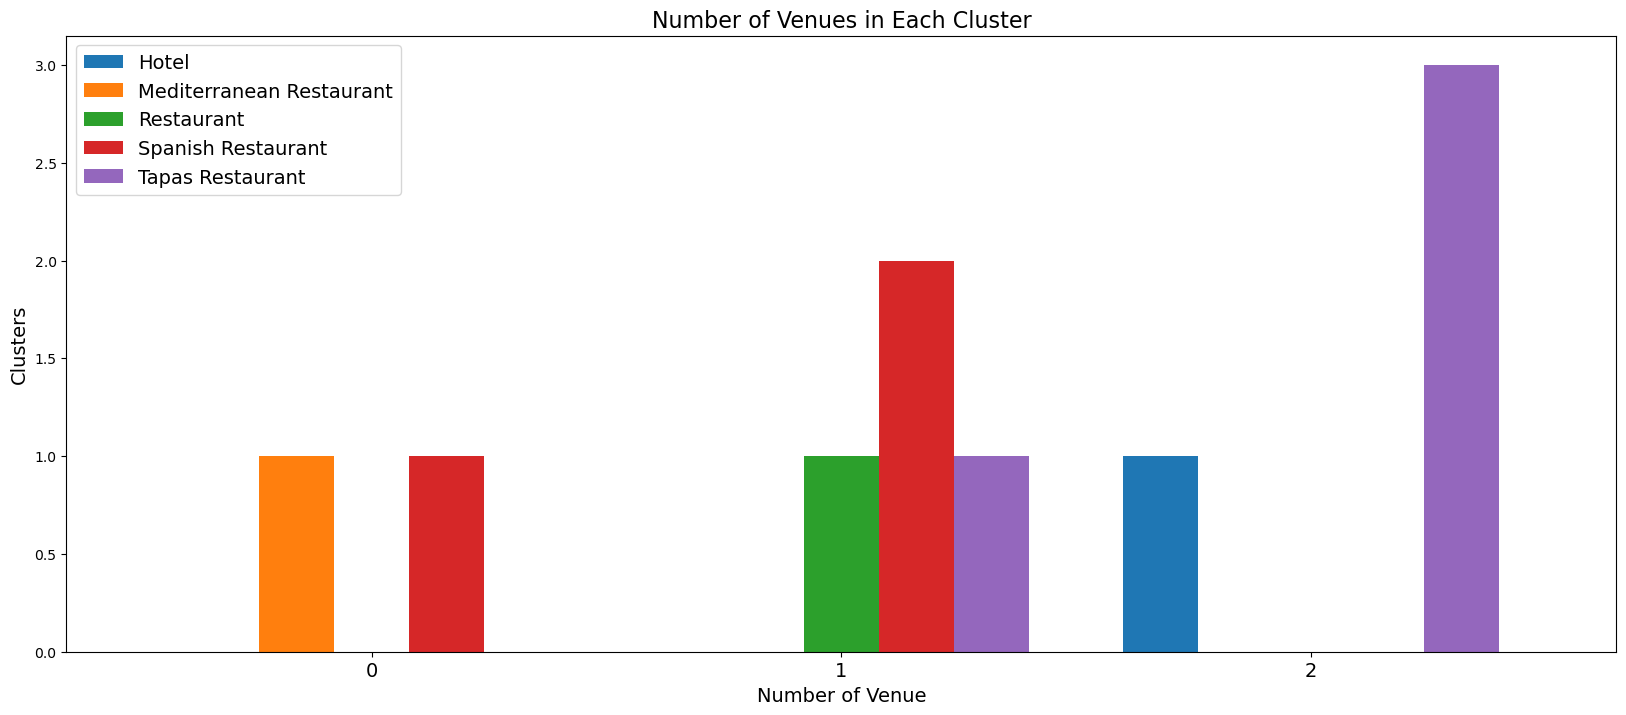

In [67]:
#creating a bar chart of "Number of Venues in Each Cluster"
frame=cv_cluster.plot(kind='bar',figsize=(20,8),width = 0.8)

plt.legend(labels=cv_cluster.columns,fontsize= 14)
plt.title("Number of Venues in Each Cluster",fontsize= 16)
plt.xticks(fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Number of Venue', fontsize=14)
plt.ylabel('Clusters', fontsize=14)